In [2]:
#IMPORTING LIBRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# DATA

In [3]:
df = pd.read_csv("customer_segmentation.csv",sep='\t')
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1249,10833,1975,Graduation,Married,65106.0,0,1,24-05-2014,55,790,...,6,0,1,0,0,0,0,3,11,0
1006,8952,1953,Master,Married,65569.0,0,1,05-11-2012,96,397,...,3,0,0,0,0,0,0,3,11,0
1734,2499,1958,2n Cycle,Single,75342.0,0,1,06-05-2013,38,204,...,4,0,0,0,0,0,0,3,11,0
1136,10542,1968,PhD,Married,36778.0,1,1,05-08-2012,63,29,...,9,0,0,0,0,0,0,3,11,0
1155,213,1963,PhD,Single,23091.0,1,1,28-05-2014,98,35,...,7,0,0,0,0,0,0,3,11,0


In [4]:
print(df.shape)
print("Number of datapoints:", len(df))

(2240, 29)
Number of datapoints: 2240


# DATA SCRUBBING

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
((df.isnull().sum())*100/len(df)).sort_values(ascending=False).round(2)

Income                 1.07
ID                     0.00
NumDealsPurchases      0.00
Z_Revenue              0.00
Z_CostContact          0.00
Complain               0.00
AcceptedCmp2           0.00
AcceptedCmp1           0.00
AcceptedCmp5           0.00
AcceptedCmp4           0.00
AcceptedCmp3           0.00
NumWebVisitsMonth      0.00
NumStorePurchases      0.00
NumCatalogPurchases    0.00
NumWebPurchases        0.00
MntGoldProds           0.00
Year_Birth             0.00
MntSweetProducts       0.00
MntFishProducts        0.00
MntMeatProducts        0.00
MntFruits              0.00
MntWines               0.00
Recency                0.00
Dt_Customer            0.00
Teenhome               0.00
Kidhome                0.00
Marital_Status         0.00
Education              0.00
Response               0.00
dtype: float64

In [7]:
#To remove the NA values
df = df.dropna()
df=df.reset_index(drop=True)
print("The total number of data-points after removing the rows with missing values are:", len(df))
print("Now data has a no missing value.")

The total number of data-points after removing the rows with missing values are: 2216
Now data has a no missing value.


In [8]:
df["Dt_Customer"] = pd.to_datetime(df.Dt_Customer)
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [9]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,83894400000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,10800000000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,40780800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,5616000000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,27734400000000000


In [10]:
print("Total number of categories in the feature Education:\n", df["Education"].value_counts(ascending=True),"\n")
print("Total number of categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(ascending=True))

Total number of categories in the feature Education:
 Basic           54
2n Cycle       200
Master         365
PhD            481
Graduation    1116
Name: Education, dtype: int64 

Total number of categories in the feature Marital_Status:
 Absurd        2
YOLO          2
Alone         3
Widow        76
Divorced    232
Single      471
Together    573
Married     857
Name: Marital_Status, dtype: int64


# Feature Engineering

In [11]:
#Today's age of customers. 
df['Age'] = 2022-df['Year_Birth']

#Deriving living situation by marital status.
df['Living_With']=df['Marital_Status'].replace({'Married':'Partner', 'Absurd':'Alone','Together':'Partner', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

#Total spendings.
df['Spent'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

#Feature indicating total children living in the household
df['Children']=df['Kidhome']+df['Teenhome']

#Feature for total members in the householde
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner':2, 'N_Single':1})+ df['Children']

#Feature pertaining parenthood
df['Is_Parent'] = np.where(df.Children>0, 1, 0)

#Segmenting education levels in three groups
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

#Rename the columns
df=df.rename(columns={'MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

#Dropping some features
drop_columns = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(drop_columns, axis=1)

In [12]:
print(df.shape)
df.describe().style.background_gradient(cmap='ocean_r')

(2216, 30)


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,44237345848375448.000000,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,20085324558024976.000000,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29376000000000000.000000,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44323200000000000.000000,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59270400000000000.000000,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91843200000000000.000000,129.000000,2525.000000,3.000000,5.000000,1.000000


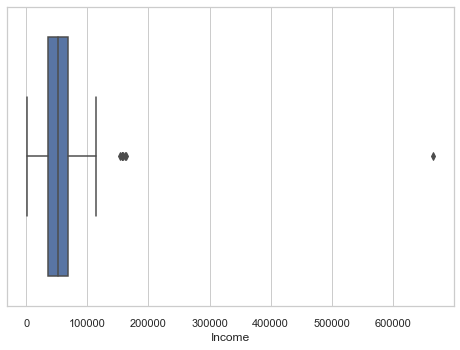

In [13]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Income"])

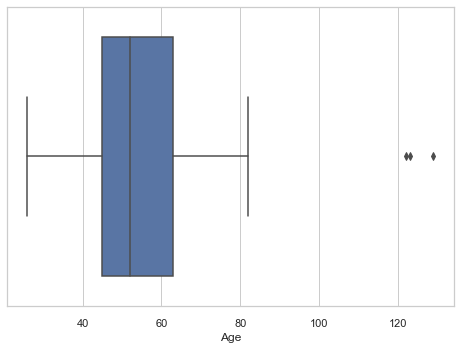

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Age"])

In [15]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<140000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2205


# EDA

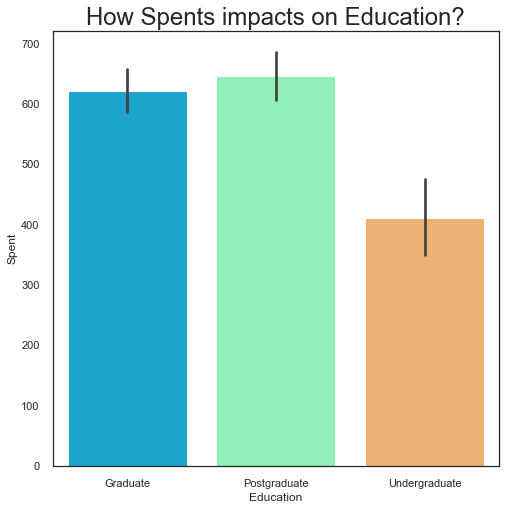

In [16]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Spents impacts on Education?",fontsize=24)
ax = sns.barplot(x="Education", y="Spent", data=df,palette="rainbow")

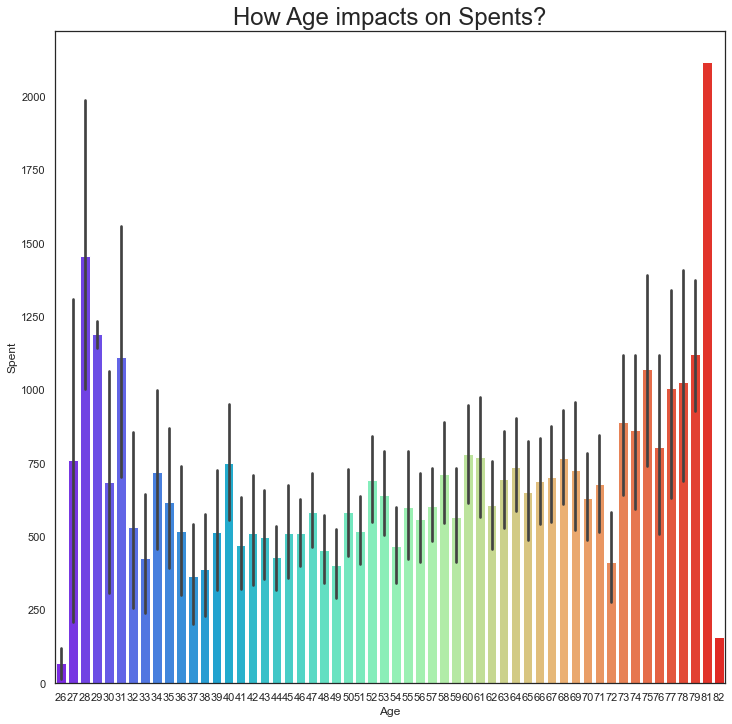

In [19]:
sns.set_theme(style="white")
plt.figure(figsize=(12,12))
plt.title("How Age impacts on Spents?",fontsize=24)
ax = sns.barplot(x="Age", y="Spent", data=df,palette="rainbow")

<AxesSubplot:>

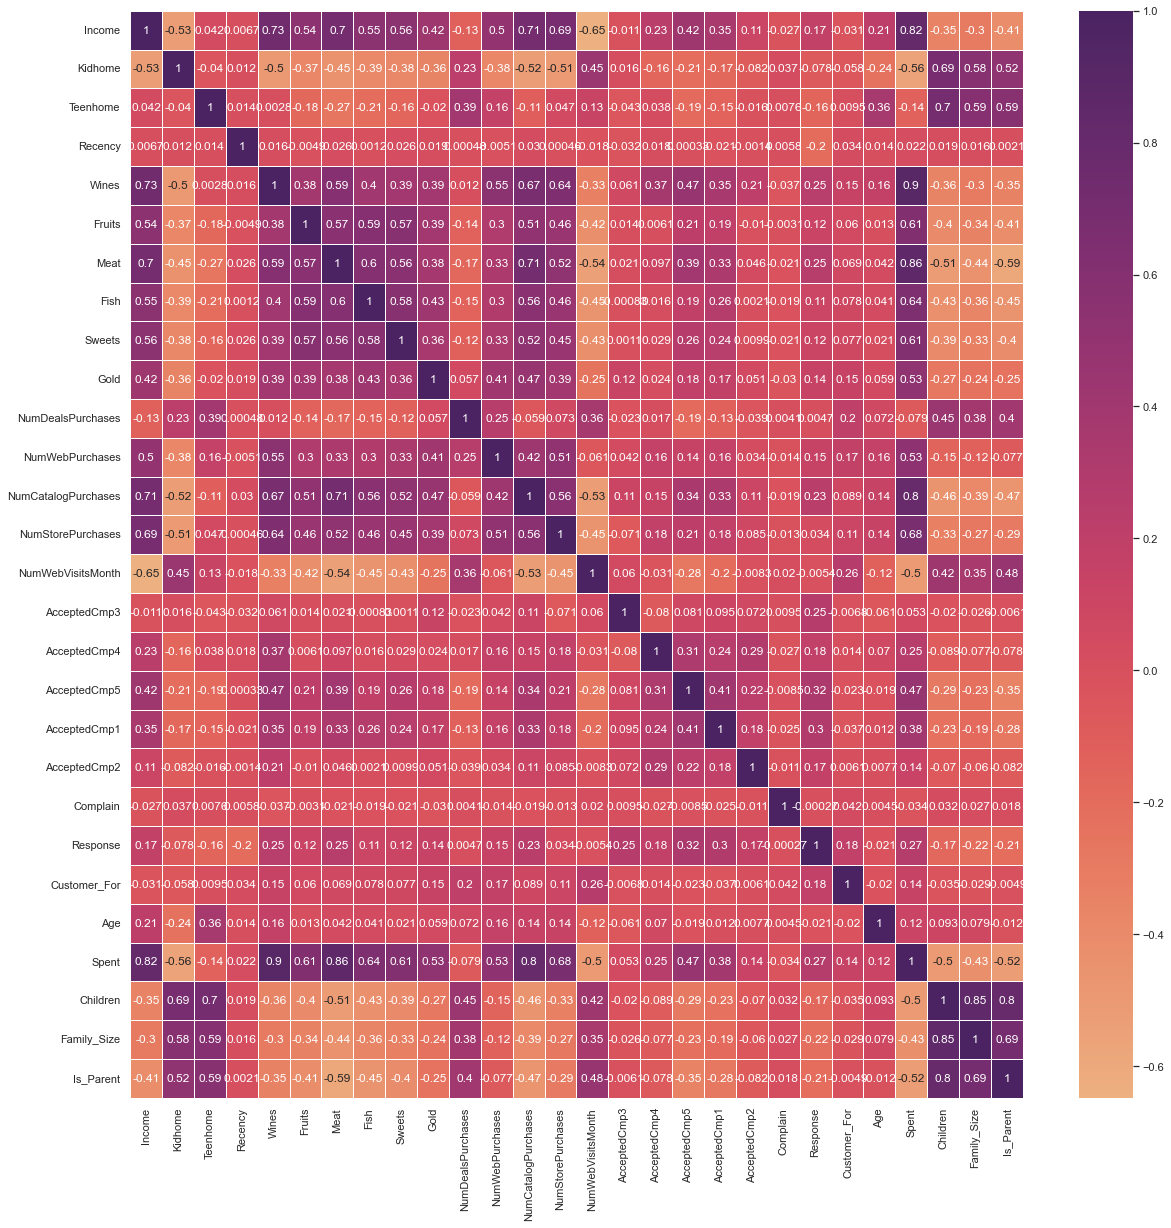

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap = 'flare',linewidths=1)

# DATA PREPROCESSING

In [21]:
# List of categorical variables.
cate_var = []
for j in df.columns:
    if (df[j].dtypes == "object"):
        cate_var.append(j)

print(" Categorical Variables are:",cate_var)

 Categorical Variables are: ['Education', 'Living_With']


In [22]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in cate_var:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [23]:
df.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Living_With,Spent,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,65,0,1617,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,68,0,27,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,57,1,776,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,38,1,53,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,41,1,422,1,3,1


In [24]:
from sklearn.preprocessing import StandardScaler
dfc=df.copy()
#dropping the features on deals accepted and promotions
colums_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
dfc = dfc.drop(colums_del, axis=1)
scaled_features = StandardScaler().fit_transform(dfc.values)
sf_dfc = pd.DataFrame(scaled_features, index=dfc.index, columns=dfc.columns)

In [25]:
#Scaled data
sf_dfc.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Living_With,Spent,Children,Family_Size,Is_Parent
0,-0.892338,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,2.628526,-0.562650,0.689203,1.974128,1.017189,-1.347625,1.679323,-1.266589,-1.759012,-1.58466
1,-0.892338,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-0.588043,-1.179732,-0.139645,-1.664957,1.273530,-1.347625,-0.963897,1.403420,0.448513,0.63105
2,-0.892338,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,-0.230646,1.288596,-0.554069,-0.172330,0.333612,0.742046,0.281242,-1.266589,-0.655250,-1.58466
3,-0.892338,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.945440,-0.562650,0.274779,-1.923048,-1.289883,0.742046,-0.920675,0.068415,0.448513,0.63105
4,0.571654,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,0.126750,0.054432,-0.139645,-0.821859,-1.033542,0.742046,-0.307248,0.068415,0.448513,0.63105


# PRINCIPLE COMPONENT ANALYSIS

In [26]:
from sklearn.decomposition import PCA
pca = PCA().fit(sf_dfc)
pca_df=pca.transform(sf_dfc)


In [27]:
pca.explained_variance_ratio_

array([3.66156585e-01, 1.27461344e-01, 6.48474247e-02, 5.71878646e-02,
       4.83043260e-02, 4.38651619e-02, 4.10663584e-02, 3.62535436e-02,
       3.19106813e-02, 2.75523978e-02, 2.65016971e-02, 2.29433323e-02,
       1.87820831e-02, 1.81622680e-02, 1.70224383e-02, 1.44970258e-02,
       1.24547013e-02, 1.01791128e-02, 8.77313290e-03, 6.07852147e-03,
       2.22645633e-33, 1.98811195e-33, 1.27052283e-33])

In [28]:
pca = PCA(n_components=3)
pca.fit(sf_dfc)
PCA_dfc = pd.DataFrame(pca.transform(sf_dfc), columns=(["col1","col2", "col3"]))
PCA_dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,6.444832e-18,2.902658,-6.048105,-2.569017,-0.792169,2.420553,7.509481
col2,2205.0,9.294656e-17,1.712583,-4.330866,-1.337574,-0.169200,1.243544,6.165607
col3,2205.0,3.071365e-18,1.221537,-3.547785,-0.834931,-0.031178,0.799139,6.747835


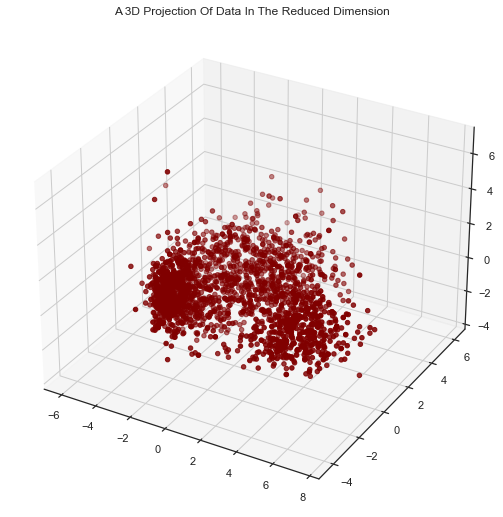

In [29]:
#Plotting
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(PCA_dfc["col1"],PCA_dfc["col2"],PCA_dfc["col3"], c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

In [31]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 116 kB/s eta 0:00:01


In [1]:
#Elbow method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_dfc)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


NameError: name 'PCA_dfc' is not defined

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AgC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AgC = AgC.fit_predict(PCA_dfc)
PCA_dfc["Clusters"] = yhat_AgC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AgC

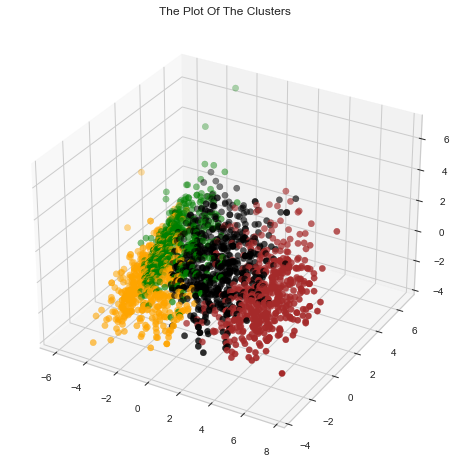

In [ ]:
#Plotting the clusters

cmap = colors.ListedColormap(["black","green", "brown","orange"])
fig = plt.figure(figsize=(10,8))
ay = plt.subplot(111, projection='3d', label="bla")
ay.scatter(PCA_dfc["col1"], PCA_dfc["col3"], PCA_dfc["col3"], s=40, c=PCA_dfc["Clusters"], marker='o', cmap = cmap)
ay.set_title("The Plot Of The Clusters")
plt.show()

# MODEL EVALUATING

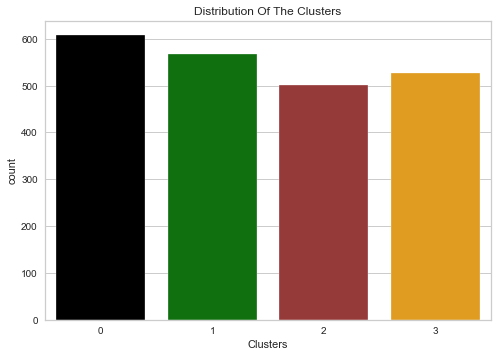

In [ ]:
#Plotting countplot of clusters
plot = ["black","green", "brown","orange"]
plo = sns.countplot(x=df["Clusters"], palette= plot)
plo.set_title("Distribution Of The Clusters")
plt.show()

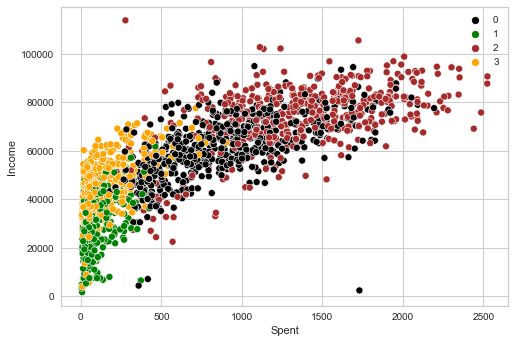

In [ ]:
dfpl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= plot)
plo.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# PROFILING

<Figure size 576x396 with 0 Axes>

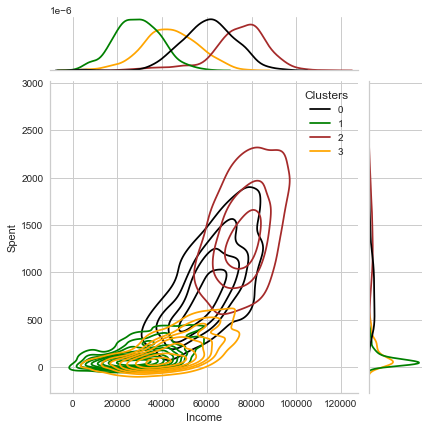

<Figure size 576x396 with 0 Axes>

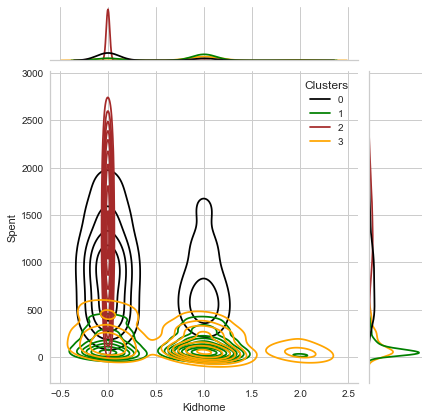

C:\python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

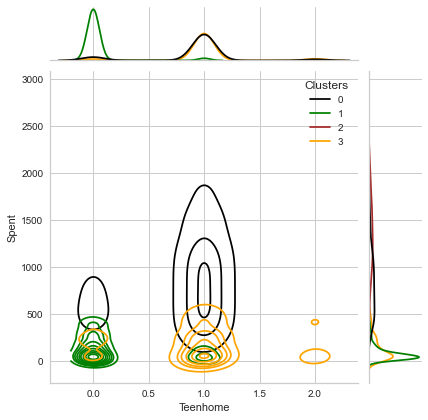

<Figure size 576x396 with 0 Axes>

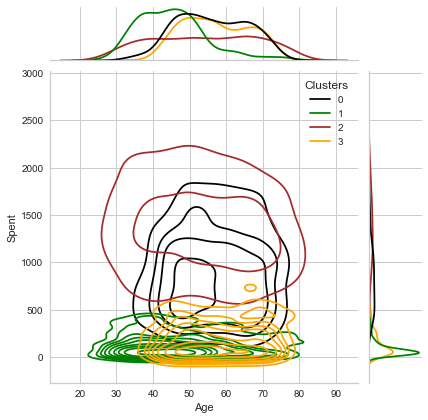

<Figure size 576x396 with 0 Axes>

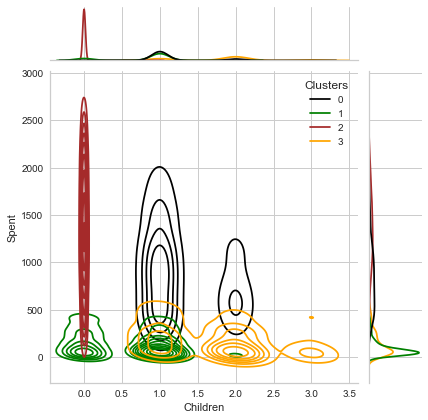

<Figure size 576x396 with 0 Axes>

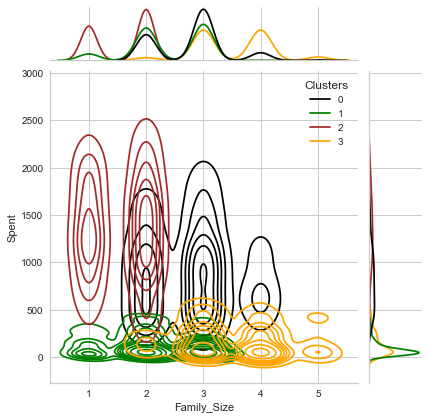

C:\python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

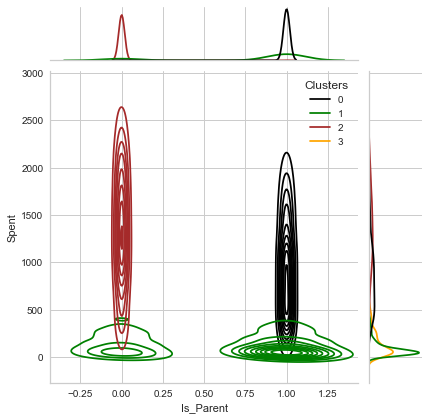

In [ ]:
columns = [ "Income","Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent"]

for j in columns:
    plt.figure()
    sns.jointplot(x=df[j], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=plot)
    plt.show()